In [ ]:
import os
import os.path as op
from collections import OrderedDict
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the main directory and target directory paths
data_dir = "./dset"
deriv_dir = "./derivatives"
os.makedirs(deriv_dir, exist_ok=True)
csv_sub_dir = op.join(deriv_dir, "csv_subset_dir")
os.makedirs(csv_sub_dir, exist_ok=True)

### Transfer the Data
#### First, we want to select the ABCD variables from the large collection of ABCD csv files.
#### Some of the variables will be selected at specific event years

In [ ]:
# variables that don't need to be controlled for age
# Define the lists of filenames and variables to extract
abcd_var = {
    "abcd": {
        "abcd_y_lt": ["interview_age", "rel_family_id", "site_id_l"],
        "abcd_p_demo": [
            "demo_sex_v2",
            "demo_ethn_v2",
            #"demo_race_a_*",
            "demo_prnt_age_v2",
            "demo_prnt_gender_id_v2",
            "demo_prnt_ethn_v2",
            #"demo_prnt_race_a_*",
            "demo_prnt_ed_v2_2yr_l",
            "demo_prtnr_ed_v2_2yr_l",
            "demo_comb_income_v2",
            "demo_prnt_income_v2_l",
            "demo_origin_v2",
            "demo_biomother_v2",
            "demo_biofather_v2",
            "demo_matgrandm_v2",
            "demo_matgrandf_v2",
            "demo_patgrandm_v2",
            "demo_patgrandf_v2",
        ],
    },
    "led_l": {
        "led_l_coi": ["reshist_addr1_coi_r_coi_nat"],
        "led_l_nbhsoc": ["reshist_addr1_nanda_disadv_fac"],
        "led_l_gi": ["reshist_addr1_gstat_h_queen"],
    },
    "ph_y": {
        "ph_y_anthro": ["anthroheightcalc", "anthroweightcalc"],
    },
}


# variables that need to be controlled for specific years
# Define the lists of filenames and shared eventname

abcd_var_age = {
    "ce_y": {
        "ce_y_meim": {
            "eventname": "3_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "meim_ss_exp",
                "meim_ss_com",
            ],
        },
        "ce_y_via": {
            "eventname": "3_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "via_ss_hc",
                "via_ss_amer",
            ],
        },
        "ce_y_macv": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "macv_y_ss_fs",
                "macv_y_ss_fo",
                "macv_y_ss_fr",
            ],
        },
        "ce_y_dm": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "dim_y_ss_mean",
            ],
        },
    },
    "ce_p": {
        "ce_p_meim": {
            "eventname": "3_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "meim_p_ss_exp",
                "meim_p_ss_com",
            ],
        },
        "ce_p_via": {
            "eventname": "3_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "via_p_ss_hc",
                "via_p_ss_amer",
            ],
        },
        "ce_p_macv": {
            "eventname": "2_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "macv_p_ss_fs",
                "macv_p_ss_fo",
                "macv_p_ss_fr",
            ],
        },
        "ce_p_comc": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "comc_ss_cohesion_p",
                "comc_ss_control_p",
            ],
        },
    },
    "ph_y": {
        "ph_y_yrb": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "physical_activity1_y",
            ],
        },
        "ph_y_resp": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "resp_wheeze_yn_y",
                "resp_pmcough_yn_y",
                "resp_diagnosis_yn_y",
                "resp_bronch_yn_y",
            ],
        },
        "ph_y_mctq": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "mctq_sdweek_calc",
                "mctq_msfsc_calc",
            ],
        },
        "ph_y_bp": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "blood_pressure_sys_mean",
                "blood_pressure_dia_mean",
            ],
        },
    },
    "mh_p": {
        "mh_p_cbcl": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "cbcl_scr_syn_internal_t",
                "cbcl_scr_syn_external_t",
            ],
        },
    },
    # here I select RS data that is available at year 4
    "mri_y": {
        "mri_y_rsfmr_cor_gp_gp": {
            "eventname": "4_year_follow_up_y_arm_1",
            "copy_entire_file": True,
        },
        "mri_y_adm_info": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "mri_info_manufacturer",
            ],
        },
        "mri_y_qc_motion": {
            "eventname": "4_year_follow_up_y_arm_1",
            "columns_to_extract": [
                "src_subject_id",
                "eventname",
                "rsfmri_meanmotion",
            ],
        },
    },
}

In [ ]:
# Function to recursively find files in directories
def find_files(directory):
    for dirpath, _, filenames in os.walk(directory):
        for filename in filenames:
            yield os.path.join(dirpath, filename)

In [ ]:

# Iterate through both dictionaries
for category, files_and_vars in {**abcd_var, **abcd_var_age}.items():
    for filename, vars_or_info in files_and_vars.items():
        # Initialize processing parameters
        found_file = False
        copy_entire_file = False
        columns_to_extract = []
        eventname_filter = None

        # Determine if it's from `abcd_var` or `abcd_var_age`
        if isinstance(vars_or_info, dict):  # Logic for `abcd_var_age`
            eventname_filter = vars_or_info["eventname"]
            copy_entire_file = vars_or_info.get("copy_entire_file", False)
            columns_to_extract = vars_or_info.get("columns_to_extract", [])
        else:  # Logic for `abcd_var`
            vars_to_extract = vars_or_info

        # Search for the file in all subdirectories of `data_dir`
        for file_path in find_files(data_dir):
            if filename + ".csv" in file_path:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Handle processing logic based on dictionary type
                if eventname_filter is not None:  # `abcd_var_age` logic
                    df_filtered = df[df["eventname"] == eventname_filter]
                    if not copy_entire_file and columns_to_extract:
                        df_filtered = df_filtered[columns_to_extract]
                    df_subset = df_filtered
                else:  # `abcd_var` logic
                    # Ordered dictionary to maintain the order of columns
                    columns_to_keep = OrderedDict()
                    columns_to_keep["src_subject_id"] = True
                    columns_to_keep["eventname"] = True

                    for col in vars_to_extract:
                        if "*" in col:
                            # Use regex to match pattern
                            regex_pattern = col.replace("*", ".*")
                            matched_columns = list(
                                df.filter(regex=regex_pattern).columns
                            )
                            for matched_col in matched_columns:
                                columns_to_keep[matched_col] = True
                        else:
                            columns_to_keep[col] = True

                    # Create subset dataframe with desired columns
                    df_subset = df[list(columns_to_keep.keys())]

                # Construct the destination path and filename
                output_filename = f"{filename}_subset.csv"
                output_path = os.path.join(csv_sub_dir, output_filename)

                # Save the subset dataframe to the target directory
                df_subset.to_csv(output_path, index=False)

                print(f"Saved {output_filename} to {csv_sub_dir}")

                found_file = True
                break

        if not found_file:
            print(f"File {filename}.csv not found in {data_dir}")

#### Next, we want to foward fill some of the demographic data
#### this ensures we have as much demo data as possible while making sure subject ID only appears once

In [ ]:
# clean up the demo files
file_names = [
    "abcd_y_lt_subset.csv",
    "abcd_p_demo_subset.csv",
]

# Array to store subject IDs if demo_ethn_v2 == 1 AND year 4 data available
subject_ids = []

# Loop over each file name
for file_name in file_names:
    # Define the path to the CSV file
    file_path = op.join(csv_sub_dir, file_name)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Forward fill within each 'src_subject_id' group
    df = df.set_index("src_subject_id").groupby("src_subject_id").ffill().reset_index()

    # Filter rows where 'eventname' is '4_year_follow_up_y_arm_1'
    df = df[df["eventname"] == "4_year_follow_up_y_arm_1"]

    # Additional filtering for the 'abcd_p_demo_subset.csv' file
    if file_name == "abcd_p_demo_subset.csv":
        df = df[df["demo_ethn_v2"] == 1]

        # Save the subject IDs to the array
        subject_ids = df["src_subject_id"].tolist()

    # Reset index and ensure 'src_subject_id' is preserved
    df = df.reset_index(drop=True)

    # Save the processed DataFrame
    df.to_csv(file_path, index=False)

# Print the array of subject IDs
print("Filtered subject IDs:", subject_ids)

# Print the count of subject IDs
print(
    f"Number of subject IDs w demo_ethn_v2 == 1 AND Y4 demographic data : N = {len(subject_ids)}"
)

In [ ]:
# use subject IDS to filter CSV files

rs_subject_ids = []  # Array to store unique subject IDs with RS data

for file_name in os.listdir(csv_sub_dir):
    if file_name.endswith(".csv"):  # Ensure we're only processing CSV files
        file_path = os.path.join(csv_sub_dir, file_name)

        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Keep only rows where 'src_subject_id' is in the subject_ids list
        df_filtered = df[df["src_subject_id"].isin(subject_ids)]

        # Save the filtered DataFrame back to the same file
        df_filtered.to_csv(file_path, index=False)

        # print(f"Filtered and saved {file_name}")

        if file_name == "mri_y_rsfmr_cor_gp_gp_subset.csv":
            # Get the unique subject IDs
            df_filtered = df_filtered.dropna()
            
            rs_subject_ids = df_filtered["src_subject_id"].unique().tolist()

            # Get the number of unique subject IDs
            subject_ids_count = len(rs_subject_ids)

            # Print the number of unique subject IDs
            print(
                f"Number of unique subject IDs with RS data: {subject_ids_count}"
            )

# Print the array of unique subject IDs
print(f"Subject IDs with RS data: {rs_subject_ids}")

for file_name in os.listdir(csv_sub_dir):
    if file_name.endswith(".csv"):  # Ensure we're only processing CSV files
        file_path = os.path.join(csv_sub_dir, file_name)

        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Filter rows where 'src_subject_id' is in the unique RS subject IDs list
        df_filtered = df[df["src_subject_id"].isin(rs_subject_ids)]

        # Save the filtered DataFrame back to the same file
        df_filtered.to_csv(file_path, index=False)

        print(f"Filtered and saved {file_name} with RS subject IDs")

### Now we have filtered data, we want to create measure dataframes that will be used in PLSC

In [ ]:
os.listdir(csv_sub_dir)

In [ ]:
import os
import pandas as pd

# Initialize empty DataFrames for each category
sociocult_df_Nan = pd.DataFrame()
covariate_df_Nan = pd.DataFrame()
rsfc_df_Nan = pd.DataFrame()
phyhealth_df_Nan = pd.DataFrame()


# Function to merge CSV files on subject ID and remove 'eventname' column if it exists
def merge_csv(file_path, df):
    temp_df = pd.read_csv(file_path).replace([777.0, 999.0], np.nan)

    # Remove 'eventname' column if it exists
    if "eventname" in temp_df.columns:
        temp_df = temp_df.drop(columns=["eventname"])

    # Merge on subject ID (assuming 'subject_id' is the column name for subject ID)
    if df.empty:
        return temp_df
    else:
        return pd.merge(df, temp_df, on="src_subject_id", how="outer")


# Iterate through files in the directory
for files in os.listdir(csv_sub_dir):
    print(files)
    file_path = os.path.join(csv_sub_dir, files)

    if files.startswith("ce") or files.startswith("led"):
        sociocult_df_Nan = merge_csv(file_path, sociocult_df_Nan)
    elif files.startswith(("abcd", "mri_y_adm", "mri_y_qc")):
        covariate_df_Nan = merge_csv(file_path, covariate_df_Nan)
    elif files.startswith("mri_y_rsfmr"):
        rsfc_df_Nan = merge_csv(file_path, rsfc_df_Nan)
    elif files.startswith(("mh", "ph")):
        phyhealth_df_Nan = merge_csv(file_path, phyhealth_df_Nan)

# After merging, you can print or save the DataFrames as needed
# Display the first few rows of each DataFrame
print("Sociocultural DataFrame:")
print(sociocult_df_Nan.head())

print("\nCovariate DataFrame:")
print(covariate_df_Nan.head())

print("\nPhysical Health DataFrame:")
print(phyhealth_df_Nan.head())

print("\nRSFC DataFrame:")
print(rsfc_df_Nan.head())

In [ ]:
# Define file paths for saving
sociocult_save_path = os.path.join(deriv_dir, "sociocult_Nan.csv")
covariate_save_path = os.path.join(deriv_dir, "covariate_Nan.csv")
phyhealth_save_path = os.path.join(deriv_dir, "phyhealth_Nan.csv")
rsfc_save_path = os.path.join(deriv_dir, "rsfc_Nan.csv")

# Save each DataFrame to a CSV file
sociocult_df_Nan.to_csv(sociocult_save_path, index=False)
covariate_df_Nan.to_csv(covariate_save_path, index=False)
phyhealth_df_Nan.to_csv(phyhealth_save_path, index=False)
rsfc_df_Nan.to_csv(rsfc_save_path, index=False)

print("DataFrames have been saved successfully.")

#### Create a plot that shows percentage of missing data 

In [ ]:
def missing_data_summary(df, df_name):

    # Calculate the number of non-NaN values for each column (except the first column)
    non_nan_counts = df.iloc[:, 1:].notna().sum()
    # Calculate the percentage of missing data for each column (except the first column)
    missing_percentage = df.iloc[:, 1:].isna().mean() * 100

    # Create the summary DataFrame
    summary = pd.DataFrame(
        {
            "Measure": df.columns[1:],  # Exclude the first column
            "Number of Subjects": non_nan_counts,  # Number of non-NaN values
            "Percentage Missing": missing_percentage,
        }
    )

    # Determine if an asterisk should be added
    summary["Above 5%"] = summary["Percentage Missing"].apply(
        lambda x: "*" if x > 5 else ""
    )

    # Create a formatted string for the DataFrame summary
    summary_str = f"\n{df_name} Missing Data Summary:\n"
    summary_str += (
        summary.to_string(
            index=False,
            columns=["Measure", "Number of Subjects", "Percentage Missing", "Above 5%"],
        )
        + "\n"
    )

    return summary, summary_str


# Generate missing data summaries for each DataFrame
sociocult_summary, sociocult_summary_str = missing_data_summary(
    sociocult_df_Nan, "Sociocultural DataFrame"
)
covariate_summary, covariate_summary_str = missing_data_summary(
    covariate_df_Nan, "Covariate DataFrame"
)
phyhealth_summary, phyhealth_summary_str = missing_data_summary(
    phyhealth_df_Nan, "Physical Health DataFrame"
)
rsfc_summary, rsfc_summary_str = missing_data_summary(rsfc_df_Nan, "RSFC DataFrame")

# Combine all summaries into one string
all_summaries = (
    sociocult_summary_str
    + covariate_summary_str
    + phyhealth_summary_str
    + rsfc_summary_str
)

# Write the combined summaries to a text file
with open("PLSC-missing_data.txt", "w") as file:
    file.write(all_summaries)

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


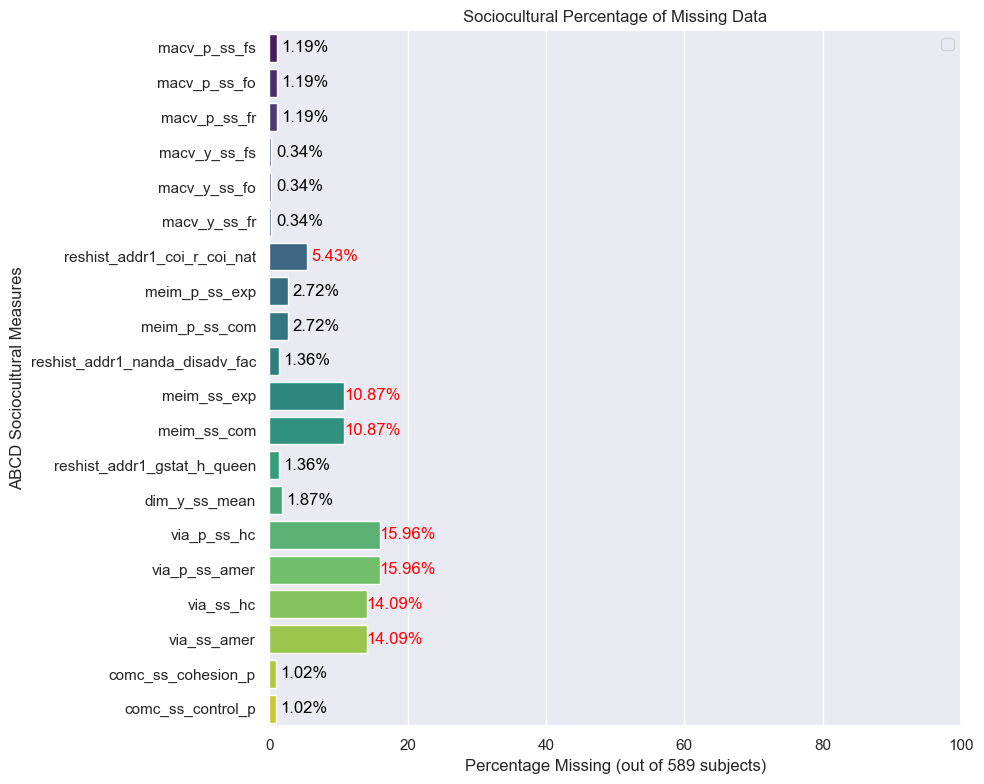

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


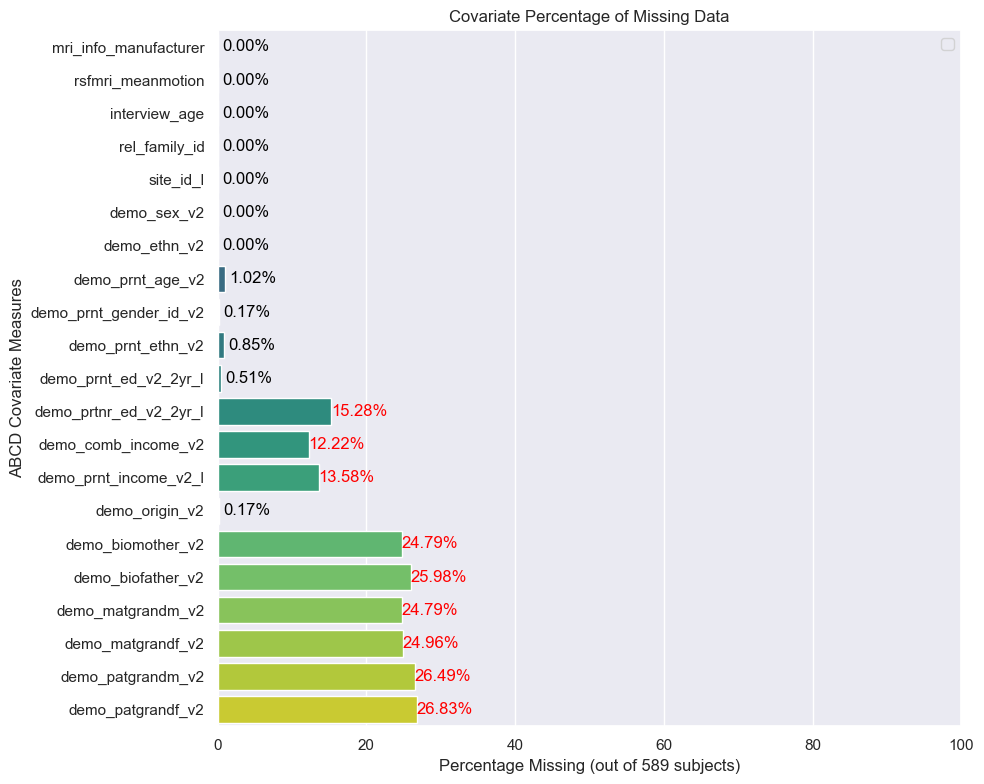

/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_2305/3734573659.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


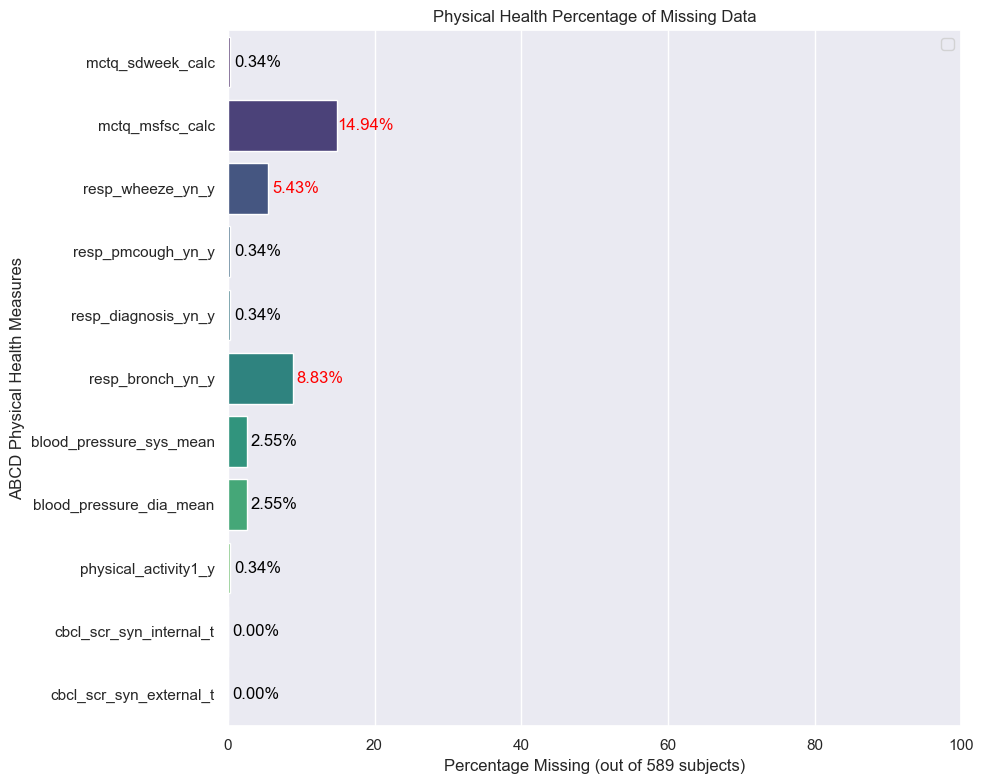

In [19]:
sns.set_theme(color_codes=True)


def plot_missing_data_summary(summary, df_name, deriv_dir):
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(
        x="Percentage Missing", y="Measure", data=summary, palette="viridis"
    )
    plt.title(f"{df_name} Percentage of Missing Data")
    plt.xlabel("Percentage Missing (out of 589 subjects)")
    plt.ylabel(f"ABCD {df_name} Measures")
    plt.xlim(0, 100)

    # Add vertical lines
    # plt.axvline(x=5, color="green", linestyle="--", label="5% Missing")
    # plt.axvline(x=10, color="red", linestyle="--", label="10% Missing")

    # Add custom legend with total number of subjects
    plt.legend()

    for index, row in summary.iterrows():
        percentage_missing = format(row["Percentage Missing"], ".2f")
        text_color = "red" if row["Percentage Missing"] > 5 else "black"
        barplot.annotate(
            f"{percentage_missing}%",
            xy=(row["Percentage Missing"], index),
            xytext=(20, 0),  # Move text slightly more to the right
            textcoords="offset points",
            ha="center",
            va="center",
            color=text_color,
        )

    # Save the figure
    file_path = os.path.join(deriv_dir, f"{df_name.replace(' ', '_')}_missing_data.png")
    plt.tight_layout()  # Ensure a tight layout with some padding
    #plt.savefig(file_path)
    #plt.close()
    plt.show()


# Plot and save the bar plots
plot_missing_data_summary(sociocult_summary, "Sociocultural", deriv_dir)
plot_missing_data_summary(covariate_summary, "Covariate", deriv_dir)
plot_missing_data_summary(phyhealth_summary, "Physical Health", deriv_dir)
#plot_missing_data_summary(rsfc_summary, "RSFC DataFrame", deriv_dir)

#### Now we will remove all subjects with missing data to make final csvs for the PLSC

In [ ]:
#specify covariates we want to include

cov_list = [
    "src_subject_id",
    "interview_age",
    "demo_sex_v2",
    "demo_prnt_age_v2",
    "demo_prnt_gender_id_v2",
    "demo_prnt_ed_v2_2yr_l",
    "demo_prtnr_ed_v2_2yr_l",
    "demo_comb_income_v2",
    "demo_prnt_income_v2_l",
    "mri_info_manufacturer",
    "rsfmri_meanmotion",
]
covariate_df_Nan_filtered = covariate_df_Nan[cov_list]

In [ ]:
# Remove rows with any NaN values
sociocult_df_cleaned = sociocult_df_Nan.dropna()
covariate_df_cleaned = covariate_df_Nan_filtered.dropna()
rsfc_df_cleaned = rsfc_df_Nan.dropna()

print(sociocult_df_cleaned)
print(covariate_df_cleaned)
print(rsfc_df_cleaned)

In [ ]:
# Get the intersection of subject IDs in both DataFrames
# Get the intersection of subject IDs in all three DataFrames
common_ids = (
    set(sociocult_df_cleaned["src_subject_id"])
    .intersection(set(covariate_df_cleaned["src_subject_id"]))
    .intersection(set(rsfc_df_cleaned["src_subject_id"]))
)
print(common_ids)

# Count the number of common IDs
print("Number of common subject IDs:", len(common_ids))

# Filter both DataFrames to keep only the rows with common subject IDs
sociocult_df_final = sociocult_df_cleaned[
    sociocult_df_cleaned["src_subject_id"].isin(common_ids)
]
sociocult_df_final = sociocult_df_final.drop(columns=["src_subject_id"])

covariate_df_final = covariate_df_cleaned[
    covariate_df_cleaned["src_subject_id"].isin(common_ids)
]
rsfc_df_final = rsfc_df_cleaned[rsfc_df_cleaned["src_subject_id"].isin(common_ids)]
# Drop the src_subject_id column from rsfc_df_final
rsfc_df_final = rsfc_df_final.drop(columns=["src_subject_id"])


print(sociocult_df_final)
print(covariate_df_final)
print(rsfc_df_final)

In [ ]:
# Define file paths for saving
sociocult_save_path = os.path.join(deriv_dir, "sociocult.csv")
covariate_save_path = os.path.join(deriv_dir, "covariate.csv")
rsfc_save_path = os.path.join(deriv_dir, "rsfc.csv")

# Save each DataFrame to a CSV file
sociocult_df_final.to_csv(sociocult_save_path, index=False)
covariate_df_final.to_csv(covariate_save_path, index=False)
rsfc_df_final.to_csv(rsfc_save_path, index=False)

print("DataFrames have been saved successfully.")